In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import efficient_bennett as eb

[[1. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]]
2.211847227972915


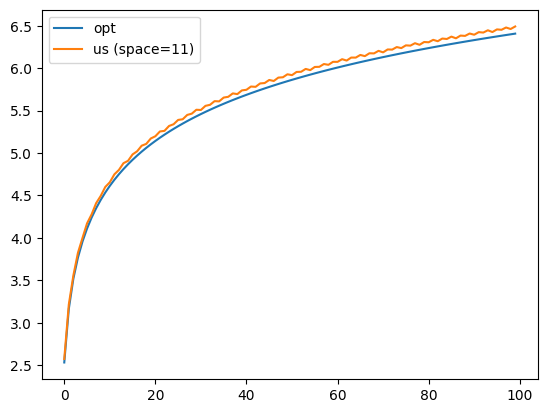

In [2]:
n = 100

B = eb.bennett_matrix(n)
amir_space = 10
L_amir = eb.amir_matrix(n, 0.94, space=amir_space, always_mult=True)
R_amir = np.linalg.inv(L_amir) @ eb.counting_matrix(n)

print(L_amir @ R_amir)

base = 0.6
threshold_f = lambda x : math.pow(base, x)
L_our, R_our, our_space = eb.approx_bennett_mm(n, threshold_f, 'mean')

amir_variance = eb.get_variance(L_amir, R_amir)
our_variance = eb.get_variance(L_our, R_our)
opt_variance = eb.get_variance(B, B)

print( eb.compute_sensitivity(R_amir)  / eb.compute_sensitivity(B))

t = np.arange(n)
plt.figure()
plt.plot(t, opt_variance, label='opt')
# plt.plot(t, amir_variance, label=f'amir (space={amir_space})')
plt.plot(t, our_variance, label=f'us (space={our_space})')
plt.legend()
plt.show()

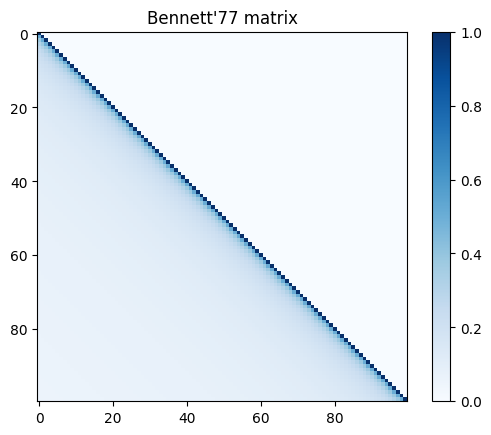

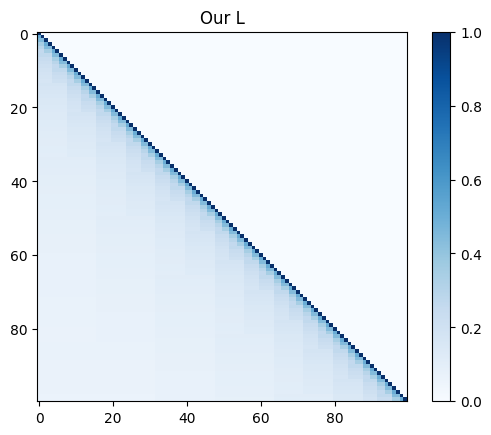

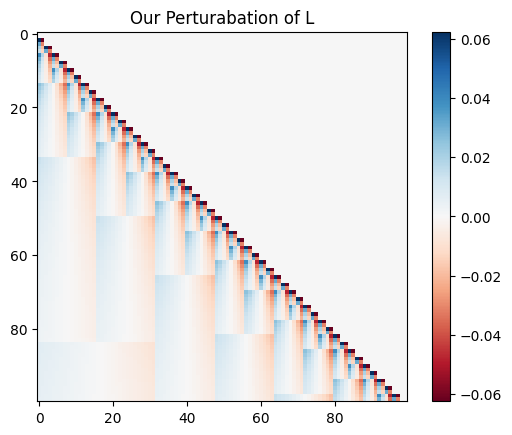

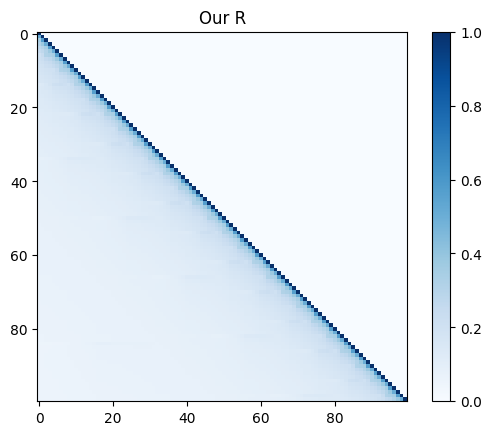

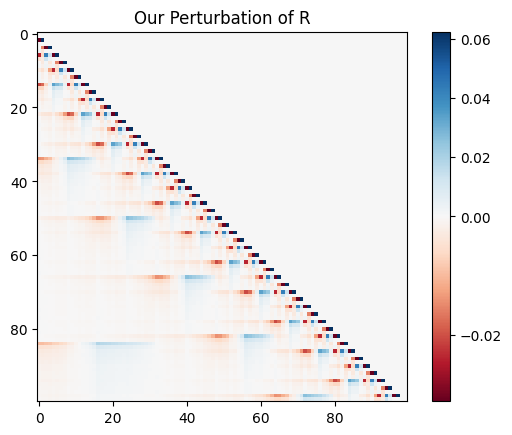

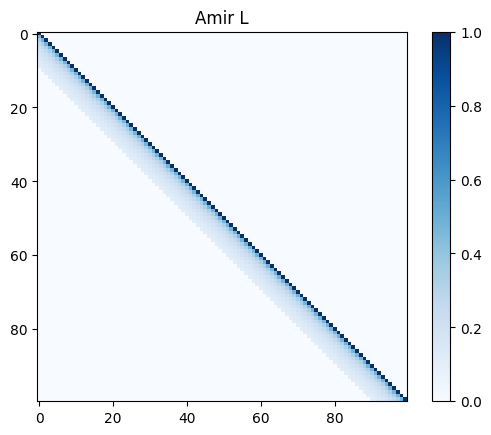

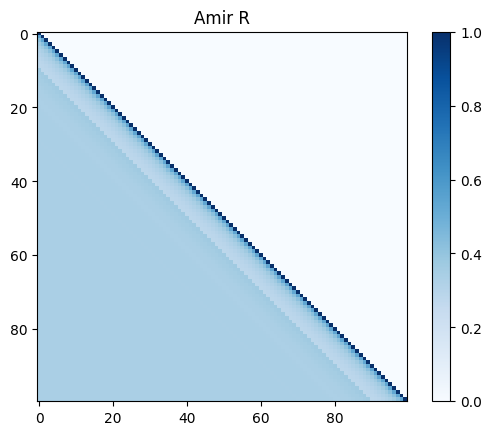

In [3]:
plt.figure()
plt.title("Bennett'77 matrix")
plt.imshow(B, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.figure()
plt.title('Our L')
plt.imshow(L_our, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.show()
plt.figure()
plt.title('Our Perturabation of L')
P = L_our - B
norm = mcolors.TwoSlopeNorm(vmin=P.min(), vcenter=0, vmax = P.max())
plt.imshow(P, cmap='RdBu', interpolation='nearest', norm=norm)
plt.colorbar()
plt.show()
plt.figure()
plt.title('Our R')
plt.imshow(R_our, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.show()
plt.figure()
plt.title('Our Perturbation of R')
P = R_our - B
norm = mcolors.TwoSlopeNorm(vmin=P.min(), vcenter=0, vmax = P.max())
plt.imshow(P, cmap='RdBu', interpolation='nearest', norm=norm)
plt.colorbar()
plt.show()
plt.title('Amir L')
plt.imshow(L_amir, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.show()
plt.title('Amir R')
plt.imshow(R_amir, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.show()

In [6]:
for k in range(100):
    assert abs(eb.bennett_constant_k(k) - eb.bennett_constant_k_old(k)) < 1e-6

1.0
0.5
0.375
0.3125
0.2734375
0.24609375
0.2255859375
0.20947265625
0.196380615234375
0.1854705810546875
0.17619705200195312
0.16818809509277344
0.1611802577972412
0.15498101711273193
0.14944598078727722
0.14446444809436798
0.13994993409141898
0.13583375955931842
0.13206059957155958
0.1285853206354659
0.12537068761957926
0.12238567124768451
0.11960417871932805
0.11700408787760352
0.11456650271348678
0.11227517265921705
0.11011603472346287
0.1080768488952506
0.10614690516497827
0.10431678611040968
0.10257817300856951
0.10092368634714097
0.09934675374796689
0.09784149990330074
0.09640265431648748
0.09502547354053767
0.09370567529691909
0.09243938238750125
0.09122307472450782
0.09005354812547567
0.08892787877390723
0.08784339244739617
0.08679763777540335
0.08578836291754982
0.08481349515712312
0.08387112298871065
0.08295948034752901
0.08207693268425742
0.08122196463546306
0.08039316907795835
0.07958923738717877
0.078808950746128
0.07805117237356907
0.07731484055872408
0.07659896240540255